<a href="https://colab.research.google.com/github/yuanjinren/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/module2-Train/YuanjinRen_LS_DS_432_Train_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [3]:
import numpy as np
import tensorflow as tf 

DATA_URL = 'https://github.com/yuanjinren/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/quickdraw10.npz?raw=true'
path = tf.keras.utils.get_file('quickdraw10.npz', DATA_URL)

25427968/25421363 [==============================] - 0s 0us/step


In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

In [5]:
def load_quickdraw10(path):
  with np.load(path) as data:
    X = data['arr_0']
    y = data['arr_1']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle= True)
  return X_train, y_train, X_test, y_test

In [6]:
X_train, y_train, X_test, y_test = load_quickdraw10(path)

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80000, 784), (80000,), (20000, 784), (20000,))

### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [9]:
##### Your Code Here #####

def create_model():
  opt = SGD()
  model = Sequential([
                      Dense(units=32, activation='relu',input_dim=784),
                      Dense(units=20, activation='relu'),
                      Dense(units=10, activation='softmax')
  ])
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model



In [10]:
model = create_model()
bt_default = model.fit(X_train,
          y_train,
          epochs=30,
          batch_size=32,
          validation_data=(X_test, y_test))

Epoch 1/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.9727 - accuracy: 0.0995 - val_loss: 2.3052 - val_accuracy: 0.0966
Epoch 2/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3039 - accuracy: 0.0999 - val_loss: 2.3028 - val_accuracy: 0.0991
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3026 - accuracy: 0.0991 - val_loss: 2.3028 - val_accuracy: 0.0985
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3028 - val_accuracy: 0.1009
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3028 - val_accuracy: 0.0966
Epoch 6/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3027 - accuracy: 0.1006 - val_loss: 2.3028 - val_accuracy: 0.0985
Epoch 7/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3028 - val_accuracy:

In [11]:
model.evaluate(X_test, y_test)

625/625 [==============================] - 1s 1ms/step - loss: 2.2316 - accuracy: 0.1703


[2.231595754623413, 0.17030000686645508]

### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [12]:
model = create_model()
bt_small = model.fit(X_train,
          y_train,
          epochs=30,
          batch_size=8,
          validation_data=(X_test, y_test))

Epoch 1/30
10000/10000 [==============================] - 19s 2ms/step - loss: 4.9419 - accuracy: 0.0993 - val_loss: 2.3028 - val_accuracy: 0.0967
Epoch 2/30
10000/10000 [==============================] - 19s 2ms/step - loss: 2.3480 - accuracy: 0.1000 - val_loss: 2.3024 - val_accuracy: 0.0967
Epoch 3/30
10000/10000 [==============================] - 19s 2ms/step - loss: 2.3097 - accuracy: 0.1001 - val_loss: 2.3026 - val_accuracy: 0.0985
Epoch 4/30
10000/10000 [==============================] - 19s 2ms/step - loss: 2.3026 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.0979
Epoch 5/30
10000/10000 [==============================] - 19s 2ms/step - loss: 2.3026 - accuracy: 0.0994 - val_loss: 2.3025 - val_accuracy: 0.0979
Epoch 6/30
10000/10000 [==============================] - 20s 2ms/step - loss: 2.3026 - accuracy: 0.0992 - val_loss: 2.3024 - val_accuracy: 0.0985
Epoch 7/30
10000/10000 [==============================] - 19s 2ms/step - loss: 2.3026 - accuracy: 0.0988 - val_loss: 2

In [13]:
model = create_model()
bt_large = model.fit(X_train,
          y_train,
          epochs=30,
          batch_size=500,
          validation_data=(X_test, y_test))

Epoch 1/30
160/160 [==============================] - 0s 3ms/step - loss: 29.1063 - accuracy: 0.1102 - val_loss: 2.2905 - val_accuracy: 0.1132
Epoch 2/30
160/160 [==============================] - 0s 2ms/step - loss: 2.2757 - accuracy: 0.1171 - val_loss: 2.3044 - val_accuracy: 0.1175
Epoch 3/30
160/160 [==============================] - 0s 2ms/step - loss: 2.2659 - accuracy: 0.1210 - val_loss: 2.3016 - val_accuracy: 0.1200
Epoch 4/30
160/160 [==============================] - 0s 3ms/step - loss: 2.2615 - accuracy: 0.1217 - val_loss: 2.2960 - val_accuracy: 0.1235
Epoch 5/30
160/160 [==============================] - 0s 2ms/step - loss: 2.2548 - accuracy: 0.1241 - val_loss: 2.3022 - val_accuracy: 0.1256
Epoch 6/30
160/160 [==============================] - 0s 2ms/step - loss: 2.2478 - accuracy: 0.1262 - val_loss: 2.2915 - val_accuracy: 0.1253
Epoch 7/30
160/160 [==============================] - 0s 2ms/step - loss: 2.2485 - accuracy: 0.1265 - val_loss: 2.2856 - val_accuracy: 0.1253
Epoch

In [14]:
model = create_model()
bt_medium = model.fit(X_train,
          y_train,
          epochs=30,
          batch_size=250,
          validation_data=(X_test, y_test))

Epoch 1/30
320/320 [==============================] - 1s 3ms/step - loss: 135.7528 - accuracy: 0.1004 - val_loss: 2.3042 - val_accuracy: 0.0978
Epoch 2/30
320/320 [==============================] - 1s 2ms/step - loss: 2.3162 - accuracy: 0.0996 - val_loss: 2.3043 - val_accuracy: 0.0978
Epoch 3/30
320/320 [==============================] - 1s 2ms/step - loss: 2.3059 - accuracy: 0.0997 - val_loss: 2.3043 - val_accuracy: 0.0978
Epoch 4/30
320/320 [==============================] - 1s 2ms/step - loss: 2.3039 - accuracy: 0.1000 - val_loss: 2.3043 - val_accuracy: 0.0978
Epoch 5/30
320/320 [==============================] - 1s 2ms/step - loss: 2.3035 - accuracy: 0.0998 - val_loss: 2.3043 - val_accuracy: 0.0978
Epoch 6/30
320/320 [==============================] - 1s 2ms/step - loss: 2.3031 - accuracy: 0.0998 - val_loss: 2.3043 - val_accuracy: 0.0966
Epoch 7/30
320/320 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1006 - val_loss: 2.3043 - val_accuracy: 0.0966
Epoc

In [15]:
model = create_model()
bt_medium2 = model.fit(X_train,
          y_train,
          epochs=30,
          batch_size=150,
          validation_data=(X_test, y_test))

Epoch 1/30
534/534 [==============================] - 1s 2ms/step - loss: 565.3075 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.0978
Epoch 2/30
534/534 [==============================] - 1s 2ms/step - loss: 3.3575 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.0978
Epoch 3/30
534/534 [==============================] - 1s 2ms/step - loss: 2.3034 - accuracy: 0.0989 - val_loss: 2.3027 - val_accuracy: 0.0978
Epoch 4/30
534/534 [==============================] - 1s 2ms/step - loss: 2.3031 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.0966
Epoch 5/30
534/534 [==============================] - 1s 2ms/step - loss: 2.3029 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.0966
Epoch 6/30
534/534 [==============================] - 1s 3ms/step - loss: 2.3028 - accuracy: 0.1008 - val_loss: 2.3027 - val_accuracy: 0.0966
Epoch 7/30
534/534 [==============================] - 1s 3ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.0966
Epoc

In [16]:
model = create_model()
bt_huge = model.fit(X_train,
          y_train,
          epochs=30,
          batch_size=1000,
          validation_data=(X_test, y_test))

Epoch 1/30
80/80 [==============================] - 0s 4ms/step - loss: 16.4944 - accuracy: 0.1013 - val_loss: 2.3026 - val_accuracy: 0.0966
Epoch 2/30
80/80 [==============================] - 0s 3ms/step - loss: 2.3028 - accuracy: 0.1007 - val_loss: 2.3026 - val_accuracy: 0.0966
Epoch 3/30
80/80 [==============================] - 0s 3ms/step - loss: 2.3028 - accuracy: 0.1005 - val_loss: 2.3026 - val_accuracy: 0.0966
Epoch 4/30
80/80 [==============================] - 0s 3ms/step - loss: 2.3028 - accuracy: 0.1008 - val_loss: 2.3026 - val_accuracy: 0.0966
Epoch 5/30
80/80 [==============================] - 0s 3ms/step - loss: 2.3027 - accuracy: 0.1008 - val_loss: 2.3026 - val_accuracy: 0.0966
Epoch 6/30
80/80 [==============================] - 0s 3ms/step - loss: 2.3027 - accuracy: 0.1008 - val_loss: 2.3026 - val_accuracy: 0.0966
Epoch 7/30
80/80 [==============================] - 0s 2ms/step - loss: 2.3027 - accuracy: 0.1008 - val_loss: 2.3026 - val_accuracy: 0.0966
Epoch 8/30
80/80 [=

Visualization of Results

In [17]:
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
batch_sizes = []

for exp, result in zip([bt_default, bt_small, bt_large, bt_medium, bt_medium2, bt_huge], ["32_", "8_", "500_", "250_", "150_", "1000_"]):
  df = pd.DataFrame.from_dict(exp.history)
  df['epoch'] = df.index.values
  df['Batch Size'] = result
  batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,2.972741,0.099487,2.305208,0.09660,0,32_
1,2.303943,0.099875,2.302815,0.09910,1,32_
2,2.302646,0.099050,2.302797,0.09855,2,32_
3,2.302650,0.100437,2.302760,0.10085,3,32_
4,2.302663,0.098800,2.302790,0.09660,4,32_


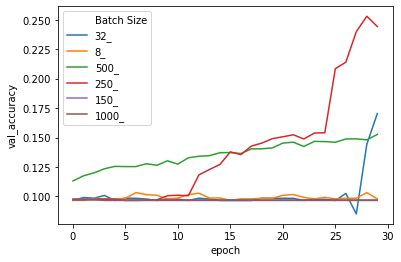

In [19]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

Based on the above visulization, the model with batch size of 250 has the best performance. The best accuracy is about 25%. Compared with the default model (model from assignment 1), the accuracy rate has big improvement. 

Model with batch size of 8 , 150 and 1000, the smallest size and the biggest size basically have the same accuracy rate, all very low. 

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [20]:
def create_model_lr(lr):
  opt = SGD(learning_rate=lr)
  model = Sequential([
                      Dense(units=32, activation='relu',input_dim=784),
                      Dense(units=20, activation='relu'),
                      Dense(units=10, activation='softmax')
  ])
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [21]:
model_lr_1 = create_model_lr(1)
lr_1 = model_lr_1.fit(X_train,
          y_train,
          epochs=30,
          batch_size=250,
          validation_data=(X_test, y_test))

Epoch 1/30
320/320 [==============================] - 1s 2ms/step - loss: 322258.0625 - accuracy: 0.1005 - val_loss: 2.3032 - val_accuracy: 0.0991
Epoch 2/30
320/320 [==============================] - 1s 2ms/step - loss: 2.3036 - accuracy: 0.1008 - val_loss: 2.3036 - val_accuracy: 0.0978
Epoch 3/30
320/320 [==============================] - 1s 2ms/step - loss: 2.3035 - accuracy: 0.0991 - val_loss: 2.3033 - val_accuracy: 0.0966
Epoch 4/30
320/320 [==============================] - 1s 2ms/step - loss: 2.3036 - accuracy: 0.0997 - val_loss: 2.3036 - val_accuracy: 0.1009
Epoch 5/30
320/320 [==============================] - 1s 2ms/step - loss: 2.3035 - accuracy: 0.1002 - val_loss: 2.3028 - val_accuracy: 0.0991
Epoch 6/30
320/320 [==============================] - 1s 2ms/step - loss: 2.3035 - accuracy: 0.0985 - val_loss: 2.3039 - val_accuracy: 0.0985
Epoch 7/30
320/320 [==============================] - 1s 2ms/step - loss: 2.3037 - accuracy: 0.0971 - val_loss: 2.3033 - val_accuracy: 0.1031
E

In [22]:
model_lr_01 = create_model_lr(0.1)
lr_01 = model_lr_01.fit(X_train,
          y_train,
          epochs=30,
          batch_size=250,
          validation_data=(X_test, y_test))

Epoch 1/30
320/320 [==============================] - 1s 2ms/step - loss: 485148.0938 - accuracy: 0.0999 - val_loss: 2.3027 - val_accuracy: 0.1009
Epoch 2/30
320/320 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3027 - val_accuracy: 0.0978
Epoch 3/30
320/320 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.0966
Epoch 4/30
320/320 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3028 - val_accuracy: 0.0991
Epoch 5/30
320/320 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3028 - val_accuracy: 0.0991
Epoch 6/30
320/320 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3028 - val_accuracy: 0.0985
Epoch 7/30
320/320 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy: 0.0966
E

In [25]:
model_lr_001 = create_model_lr(0.01)
lr_001 = model_lr_001.fit(X_train,
          y_train,
          epochs=30,
          batch_size=250,
          validation_data=(X_test, y_test))

Epoch 1/30
320/320 [==============================] - 1s 2ms/step - loss: 46.1218 - accuracy: 0.1001 - val_loss: 2.3076 - val_accuracy: 0.0966
Epoch 2/30
320/320 [==============================] - 1s 2ms/step - loss: 2.3228 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.0966
Epoch 3/30
320/320 [==============================] - 1s 2ms/step - loss: 2.3114 - accuracy: 0.1008 - val_loss: 2.3027 - val_accuracy: 0.0966
Epoch 4/30
320/320 [==============================] - 1s 2ms/step - loss: 2.3068 - accuracy: 0.1008 - val_loss: 2.3027 - val_accuracy: 0.0966
Epoch 5/30
320/320 [==============================] - 1s 2ms/step - loss: 2.3051 - accuracy: 0.1009 - val_loss: 2.3027 - val_accuracy: 0.0966
Epoch 6/30
320/320 [==============================] - 1s 2ms/step - loss: 2.3042 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.0966
Epoch 7/30
320/320 [==============================] - 1s 2ms/step - loss: 2.3039 - accuracy: 0.1008 - val_loss: 2.3027 - val_accuracy: 0.0966
Epoch

In [24]:
model_lr_0001 = create_model_lr(0.001)
lr_0001 = model_lr_0001.fit(X_train,
          y_train,
          epochs=30,
          batch_size=250,
          validation_data=(X_test, y_test))

Epoch 1/30
320/320 [==============================] - 1s 3ms/step - loss: 3.1714 - accuracy: 0.1042 - val_loss: 2.3057 - val_accuracy: 0.1020
Epoch 2/30
320/320 [==============================] - 1s 2ms/step - loss: 2.2911 - accuracy: 0.1186 - val_loss: 2.2605 - val_accuracy: 0.1378
Epoch 3/30
320/320 [==============================] - 1s 2ms/step - loss: 2.2157 - accuracy: 0.1606 - val_loss: 2.1650 - val_accuracy: 0.1784
Epoch 4/30
320/320 [==============================] - 1s 2ms/step - loss: 2.1478 - accuracy: 0.1861 - val_loss: 2.1315 - val_accuracy: 0.1884
Epoch 5/30
320/320 [==============================] - 1s 2ms/step - loss: 2.1190 - accuracy: 0.1953 - val_loss: 2.1125 - val_accuracy: 0.1959
Epoch 6/30
320/320 [==============================] - 1s 2ms/step - loss: 2.0955 - accuracy: 0.2076 - val_loss: 2.0886 - val_accuracy: 0.2105
Epoch 7/30
320/320 [==============================] - 1s 2ms/step - loss: 2.0716 - accuracy: 0.2203 - val_loss: 2.0675 - val_accuracy: 0.2219
Epoch 

In [26]:
model_lr_00001 = create_model_lr(0.0001)
lr_00001 = model_lr_00001.fit(X_train,
          y_train,
          epochs=30,
          batch_size=250,
          validation_data=(X_test, y_test))

Epoch 1/30
320/320 [==============================] - 1s 3ms/step - loss: 11.4997 - accuracy: 0.1660 - val_loss: 3.3160 - val_accuracy: 0.1688
Epoch 2/30
320/320 [==============================] - 1s 2ms/step - loss: 2.8677 - accuracy: 0.1588 - val_loss: 2.5675 - val_accuracy: 0.1481
Epoch 3/30
320/320 [==============================] - 1s 2ms/step - loss: 2.4879 - accuracy: 0.1638 - val_loss: 2.3849 - val_accuracy: 0.1843
Epoch 4/30
320/320 [==============================] - 1s 2ms/step - loss: 2.3581 - accuracy: 0.1888 - val_loss: 2.2955 - val_accuracy: 0.1984
Epoch 5/30
320/320 [==============================] - 1s 2ms/step - loss: 2.2884 - accuracy: 0.2008 - val_loss: 2.2410 - val_accuracy: 0.2063
Epoch 6/30
320/320 [==============================] - 1s 2ms/step - loss: 2.2421 - accuracy: 0.2147 - val_loss: 2.2024 - val_accuracy: 0.2205
Epoch 7/30
320/320 [==============================] - 1s 2ms/step - loss: 2.2067 - accuracy: 0.2291 - val_loss: 2.1698 - val_accuracy: 0.2296
Epoch

In [54]:
test = pd.DataFrame.from_records(lr_1.history)
test.head()

,accuracy,loss,val_accuracy,val_loss
0,0.100488,322258.062500,0.09910,2.303169
1,0.100775,2.303611,0.09780,2.303603
2,0.099113,2.303515,0.09660,2.303324
3,0.099750,2.303580,0.10085,2.303632
4,0.100200,2.303493,0.09910,2.302751


In [32]:
batch_sizes = []
for exp, result in zip([lr_1, lr_01, lr_001, lr_0001, lr_00001], ["1","0.1_","0.01_", "0.001_", "0.0001_"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Learning Rate'] = result
    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.tail(10)

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
20,1.899624,0.344825,1.885744,0.34185,20,0.0001_
21,1.885818,0.350925,1.874027,0.34610,21,0.0001_
22,1.871947,0.356088,1.862853,0.35045,22,0.0001_
23,1.858593,0.360950,1.851503,0.35545,23,0.0001_
24,1.846038,0.366313,1.840721,0.35990,24,0.0001_
25,1.834044,0.370800,1.830507,0.36455,25,0.0001_
26,1.823206,0.374588,1.820887,0.36790,26,0.0001_
27,1.813129,0.378475,1.812389,0.37110,27,0.0001_
28,1.803625,0.381625,1.804720,0.37350,28,0.0001_
29,1.795063,0.384725,1.797154,0.37525,29,0.0001_


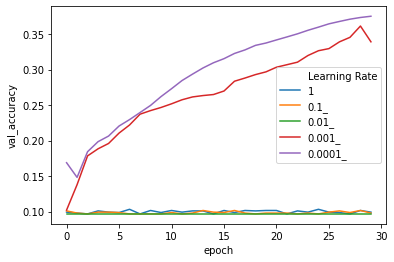

In [33]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

The lowest learning rate 0.0001 has the best performance. Models with learning rate of 1, 0.1 and 0.01 have the almost same accuracy rate. 

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [41]:
def create_model_optimizer(opt):
  model = Sequential([
                      Dense(32, activation='relu',input_dim=784),
                      Dense(32, activation='relu'),
                      Dense(10, activation='softmax')
  ])
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [55]:
model_adam = create_model_optimizer(tf.keras.optimizers.Adam(learning_rate=0.0001))
adam = model_adam.fit(X_train,
           y_train,
           epochs=30,
           batch_size=8,
           validation_data=(X_test, y_test))

Epoch 1/30
10000/10000 [==============================] - 22s 2ms/step - loss: 3.8701 - accuracy: 0.1997 - val_loss: 1.8947 - val_accuracy: 0.3119
Epoch 2/30
10000/10000 [==============================] - 20s 2ms/step - loss: 1.6767 - accuracy: 0.4198 - val_loss: 1.5179 - val_accuracy: 0.4800
Epoch 3/30
10000/10000 [==============================] - 20s 2ms/step - loss: 1.3979 - accuracy: 0.5270 - val_loss: 1.3130 - val_accuracy: 0.5809
Epoch 4/30
10000/10000 [==============================] - 19s 2ms/step - loss: 1.1959 - accuracy: 0.6151 - val_loss: 1.1377 - val_accuracy: 0.6381
Epoch 5/30
10000/10000 [==============================] - 20s 2ms/step - loss: 1.0635 - accuracy: 0.6597 - val_loss: 1.0536 - val_accuracy: 0.6602
Epoch 6/30
10000/10000 [==============================] - 20s 2ms/step - loss: 0.9743 - accuracy: 0.6862 - val_loss: 0.9799 - val_accuracy: 0.6956
Epoch 7/30
10000/10000 [==============================] - 20s 2ms/step - loss: 0.9020 - accuracy: 0.7111 - val_loss: 0

In [56]:
model_adam2 = create_model_optimizer(tf.keras.optimizers.Adam(learning_rate=0.001))
adam2 = model_adam2.fit(X_train,
           y_train,
           epochs=30,
           batch_size=8,
           validation_data=(X_test, y_test))

Epoch 1/30
10000/10000 [==============================] - 22s 2ms/step - loss: 1.7462 - accuracy: 0.4615 - val_loss: 1.3885 - val_accuracy: 0.5210
Epoch 2/30
10000/10000 [==============================] - 22s 2ms/step - loss: 1.3364 - accuracy: 0.5252 - val_loss: 1.2729 - val_accuracy: 0.5655
Epoch 3/30
10000/10000 [==============================] - 22s 2ms/step - loss: 1.2164 - accuracy: 0.5666 - val_loss: 1.1824 - val_accuracy: 0.5818
Epoch 4/30
10000/10000 [==============================] - 22s 2ms/step - loss: 1.1462 - accuracy: 0.5888 - val_loss: 1.1280 - val_accuracy: 0.5982
Epoch 5/30
10000/10000 [==============================] - 22s 2ms/step - loss: 1.0896 - accuracy: 0.6179 - val_loss: 1.0715 - val_accuracy: 0.6316
Epoch 6/30
10000/10000 [==============================] - 22s 2ms/step - loss: 1.0436 - accuracy: 0.6368 - val_loss: 1.0262 - val_accuracy: 0.6435
Epoch 7/30
10000/10000 [==============================] - 22s 2ms/step - loss: 0.9991 - accuracy: 0.6534 - val_loss: 1

In [57]:
model_adamax = create_model_optimizer(opt =tf.keras.optimizers.Adamax(learning_rate=0.1))
adamax = model_adamax.fit(X_train,
           y_train,
           epochs=30,
           batch_size=32,
           validation_data=(X_test, y_test))

Epoch 1/30
2500/2500 [==============================] - 5s 2ms/step - loss: 6.8034 - accuracy: 0.1014 - val_loss: 2.3062 - val_accuracy: 0.1009
Epoch 2/30
2500/2500 [==============================] - 6s 2ms/step - loss: 2.3070 - accuracy: 0.1008 - val_loss: 2.3119 - val_accuracy: 0.0985
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3072 - accuracy: 0.1007 - val_loss: 2.3044 - val_accuracy: 0.0985
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3071 - accuracy: 0.1008 - val_loss: 2.3058 - val_accuracy: 0.1026
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3069 - accuracy: 0.0997 - val_loss: 2.3053 - val_accuracy: 0.0966
Epoch 6/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3073 - accuracy: 0.1010 - val_loss: 2.3070 - val_accuracy: 0.0985
Epoch 7/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3069 - accuracy: 0.1000 - val_loss: 2.3083 - val_accuracy:

In [58]:
model_adamax2 = create_model_optimizer(opt =tf.keras.optimizers.Adamax(learning_rate=0.01))
adamax2 = model_adamax2.fit(X_train,
           y_train,
           epochs=30,
           batch_size=32,
           validation_data=(X_test, y_test))

Epoch 1/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3525 - accuracy: 0.3049 - val_loss: 1.6903 - val_accuracy: 0.3937
Epoch 2/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.5378 - accuracy: 0.4510 - val_loss: 1.4012 - val_accuracy: 0.4839
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.2495 - accuracy: 0.5793 - val_loss: 1.1564 - val_accuracy: 0.6033
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.1320 - accuracy: 0.6193 - val_loss: 1.1046 - val_accuracy: 0.6457
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.0805 - accuracy: 0.6457 - val_loss: 1.0480 - val_accuracy: 0.6668
Epoch 6/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.0110 - accuracy: 0.6796 - val_loss: 1.0048 - val_accuracy: 0.6956
Epoch 7/30
2500/2500 [==============================] - 6s 2ms/step - loss: 0.9858 - accuracy: 0.6899 - val_loss: 0.9968 - val_accuracy:

In [59]:
model_adamax3 = create_model_optimizer(opt =tf.keras.optimizers.Adamax(learning_rate=0.1))
adamax3 = model_adamax3.fit(X_train,
           y_train,
           epochs=30,
           batch_size=32,
           validation_data=(X_test, y_test))

Epoch 1/30
2500/2500 [==============================] - 6s 2ms/step - loss: 5.4623 - accuracy: 0.2468 - val_loss: 1.7159 - val_accuracy: 0.3786
Epoch 2/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.7037 - accuracy: 0.3518 - val_loss: 1.7220 - val_accuracy: 0.3113
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.5373 - accuracy: 0.4063 - val_loss: 1.4478 - val_accuracy: 0.4134
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.5996 - accuracy: 0.3688 - val_loss: 1.6230 - val_accuracy: 0.3269
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.6486 - accuracy: 0.3456 - val_loss: 1.6073 - val_accuracy: 0.3501
Epoch 6/30
2500/2500 [==============================] - 6s 2ms/step - loss: 1.6388 - accuracy: 0.3461 - val_loss: 1.6371 - val_accuracy: 0.3514
Epoch 7/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.6310 - accuracy: 0.3466 - val_loss: 1.5985 - val_accuracy:

In [60]:
model_ftrl = create_model_optimizer(opt = tf.keras.optimizers.Ftrl(learning_rate=0.001))
ftrl = model_ftrl.fit(X_train,
           y_train,
           epochs=30,
           batch_size=32,
           validation_data=(X_test, y_test))

Epoch 1/30
2500/2500 [==============================] - 5s 2ms/step - loss: 3.9980 - accuracy: 0.2880 - val_loss: 1.9546 - val_accuracy: 0.3377
Epoch 2/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.8242 - accuracy: 0.3701 - val_loss: 1.7360 - val_accuracy: 0.4006
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.6648 - accuracy: 0.4300 - val_loss: 1.6127 - val_accuracy: 0.4552
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.5644 - accuracy: 0.4702 - val_loss: 1.5292 - val_accuracy: 0.4913
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.4918 - accuracy: 0.5019 - val_loss: 1.4642 - val_accuracy: 0.5184
Epoch 6/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.4303 - accuracy: 0.5269 - val_loss: 1.4103 - val_accuracy: 0.5378
Epoch 7/30
2500/2500 [==============================] - 5s 2ms/step - loss: 1.3774 - accuracy: 0.5457 - val_loss: 1.3665 - val_accuracy:

In [61]:
model_Adadelta = create_model_optimizer(opt = tf.keras.optimizers.Adadelta(learning_rate=0.01))
adadelta = model_Adadelta.fit(X_train,
           y_train,
           epochs=30,
           batch_size=32,
           validation_data=(X_test, y_test))

Epoch 1/30
2500/2500 [==============================] - 5s 2ms/step - loss: 34.3878 - accuracy: 0.1534 - val_loss: 7.0229 - val_accuracy: 0.2106
Epoch 2/30
2500/2500 [==============================] - 5s 2ms/step - loss: 4.1023 - accuracy: 0.2061 - val_loss: 2.9447 - val_accuracy: 0.1997
Epoch 3/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.6436 - accuracy: 0.2117 - val_loss: 2.4491 - val_accuracy: 0.2377
Epoch 4/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.3430 - accuracy: 0.2443 - val_loss: 2.2632 - val_accuracy: 0.2591
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.2085 - accuracy: 0.2652 - val_loss: 2.1621 - val_accuracy: 0.2758
Epoch 6/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.1228 - accuracy: 0.2828 - val_loss: 2.0910 - val_accuracy: 0.2904
Epoch 7/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.0580 - accuracy: 0.2986 - val_loss: 2.0346 - val_accuracy

In [62]:
model_RMSprop = create_model_optimizer(opt = tf.keras.optimizers.RMSprop(learning_rate=0.001))
rmsprop = model_RMSprop.fit(X_train,
           y_train,
           epochs=30,
           batch_size=32,
           validation_data=(X_test, y_test))

Epoch 1/30
2500/2500 [==============================] - 6s 2ms/step - loss: 1.8343 - accuracy: 0.5268 - val_loss: 1.2103 - val_accuracy: 0.6392
Epoch 2/30
2500/2500 [==============================] - 6s 2ms/step - loss: 1.1262 - accuracy: 0.6528 - val_loss: 1.0780 - val_accuracy: 0.6995
Epoch 3/30
2500/2500 [==============================] - 6s 2ms/step - loss: 0.9754 - accuracy: 0.7069 - val_loss: 0.9878 - val_accuracy: 0.7143
Epoch 4/30
2500/2500 [==============================] - 6s 2ms/step - loss: 0.9254 - accuracy: 0.7233 - val_loss: 0.9672 - val_accuracy: 0.7288
Epoch 5/30
2500/2500 [==============================] - 6s 2ms/step - loss: 0.8870 - accuracy: 0.7319 - val_loss: 0.8987 - val_accuracy: 0.7321
Epoch 6/30
2500/2500 [==============================] - 6s 2ms/step - loss: 0.8784 - accuracy: 0.7388 - val_loss: 0.8968 - val_accuracy: 0.7301
Epoch 7/30
2500/2500 [==============================] - 6s 2ms/step - loss: 0.8582 - accuracy: 0.7519 - val_loss: 0.9154 - val_accuracy:

In [63]:
model_RMSprop2 = create_model_optimizer(opt = tf.keras.optimizers.RMSprop(learning_rate=0.01))
rmsprop2 = model_RMSprop2.fit(X_train,
           y_train,
           epochs=30,
           batch_size=32,
           validation_data=(X_test, y_test))

Epoch 1/30
2500/2500 [==============================] - 7s 3ms/step - loss: 3.2986 - accuracy: 0.1592 - val_loss: 2.0342 - val_accuracy: 0.1704
Epoch 2/30
2500/2500 [==============================] - 6s 2ms/step - loss: 2.0087 - accuracy: 0.1917 - val_loss: 1.9801 - val_accuracy: 0.1933
Epoch 3/30
2500/2500 [==============================] - 6s 2ms/step - loss: 2.0352 - accuracy: 0.1920 - val_loss: 2.0043 - val_accuracy: 0.1784
Epoch 4/30
2500/2500 [==============================] - 6s 2ms/step - loss: 2.0091 - accuracy: 0.1852 - val_loss: 2.0749 - val_accuracy: 0.1812
Epoch 5/30
2500/2500 [==============================] - 5s 2ms/step - loss: 2.0158 - accuracy: 0.1855 - val_loss: 1.9717 - val_accuracy: 0.1924
Epoch 6/30
2500/2500 [==============================] - 6s 2ms/step - loss: 1.9946 - accuracy: 0.1851 - val_loss: 2.0001 - val_accuracy: 0.1907
Epoch 7/30
2500/2500 [==============================] - 6s 2ms/step - loss: 2.0160 - accuracy: 0.1830 - val_loss: 1.9967 - val_accuracy:

In [87]:
df_adam = pd.DataFrame.from_records(adam.history)
df_adam['epoch'] = df_adam.index.values
df_adam['model'] = 'adam'

In [86]:
df_adam2 = pd.DataFrame.from_records(adam2.history)
df_adam2['epoch'] = df_adam2.index.values
df_adam2['model'] = 'adam2'

In [91]:
df_ftrl = pd.DataFrame.from_records(ftrl.history)
df_ftrl['epoch'] = df_ftrl.index.values
df_ftrl['model'] = 'ftrl'

In [92]:
df_adamax = pd.DataFrame.from_records(adamax.history)
df_adamax['epoch'] = df_adamax.index.values
df_adamax['model'] = 'adamax'

In [93]:
df_adamax2 = pd.DataFrame.from_records(adamax2.history)
df_adamax2['epoch'] = df_adamax2.index.values
df_adamax2['model'] = 'adamax2'

In [94]:
df_adamax3 = pd.DataFrame.from_records(adamax3.history)
df_adamax3['epoch'] = df_adamax3.index.values
df_adamax3['model'] = 'adamax3'

In [90]:
df_adadelta = pd.DataFrame.from_records(adadelta.history)
df_adadelta['epoch'] = df_adadelta.index.values
df_adadelta['model'] = 'adadelta'

In [89]:
df_rmsprop = pd.DataFrame.from_records(rmsprop.history)
df_rmsprop['epoch'] = df_rmsprop.index.values
df_rmsprop['model'] = 'rmsprop'

In [88]:
df_rmsprop2 = pd.DataFrame.from_records(rmsprop2.history)
df_rmsprop2['epoch'] = df_rmsprop2.index.values
df_rmsprop2['model'] = 'rmsprop2'

In [95]:
df_total = pd.concat([df_adam, df_adam2, df_ftrl, df_adamax, df_adamax2, df_adamax3, df_adadelta, df_rmsprop, df_rmsprop2])

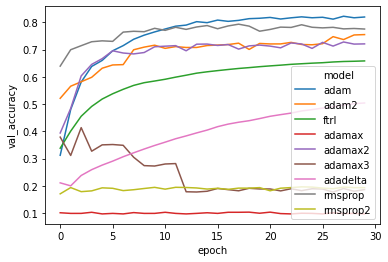

In [96]:
sns.lineplot(x='epoch', y='val_accuracy', hue='model', data=df_total);

1. The 'adam' optimizer with learning rate of 0.0001 has the best performance. 
2. The accuracy rate of 'adamax' optimizer with different learning rates has big difference. The model with learning rate of 0.01 has accuracy rate of more than 70%, however, models with learning rate of 0.1 and 0.001 has really bad accuracy rate. So accuracy rate of this optimizer can be influenced by learning rate obviously. 
3. The accuracy rate of 'rmsprop' optimizer with different learning rates has big difference. The model with 0.001 has accuracy rate of more than 70%, however, models with learning rate of 0.1 has really bad accuracy rate.

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
Your answer goes here.
```



Backpropagation is a algorithm allowing us to adjust weights of all layers from right to left. 

For a neural network model, the first step is to select weights for inputs randomly. 
Secondly, the output for every neuron from the input layer, to the hidden layers, and the output layer are calculated.
Thirdly, to calculate the error in the outputs using formular like this 'error = 1/2(actual ouput - desired output)^2'.
Fourthly, the ultimate goal is to minimize the error function in the third step, so we travel back from the output layer to the hidden layer to adjust the weights to make the error decreased. Keep repeating the process until the desired output is achieved. This backward approach is called backpropagation. 

## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


